In [3]:
import tensorflow as tf
import tensorflow.keras as keras

In [4]:
model = keras.Sequential([
        keras.layers.Reshape(target_shape=(28, 28, 1), input_shape=(28, 28)),
        keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='elu'),
        keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='elu'),
        keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='elu'),
        keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='elu'),
        keras.layers.Dense(10, activation='softmax')
    ])

optimizer_config = {
    'class_name': 'adam',
    'config': {
        'learning_rate': 0.01
    }
}
optimizer = tf.keras.optimizers.get(optimizer_config)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         819456    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0

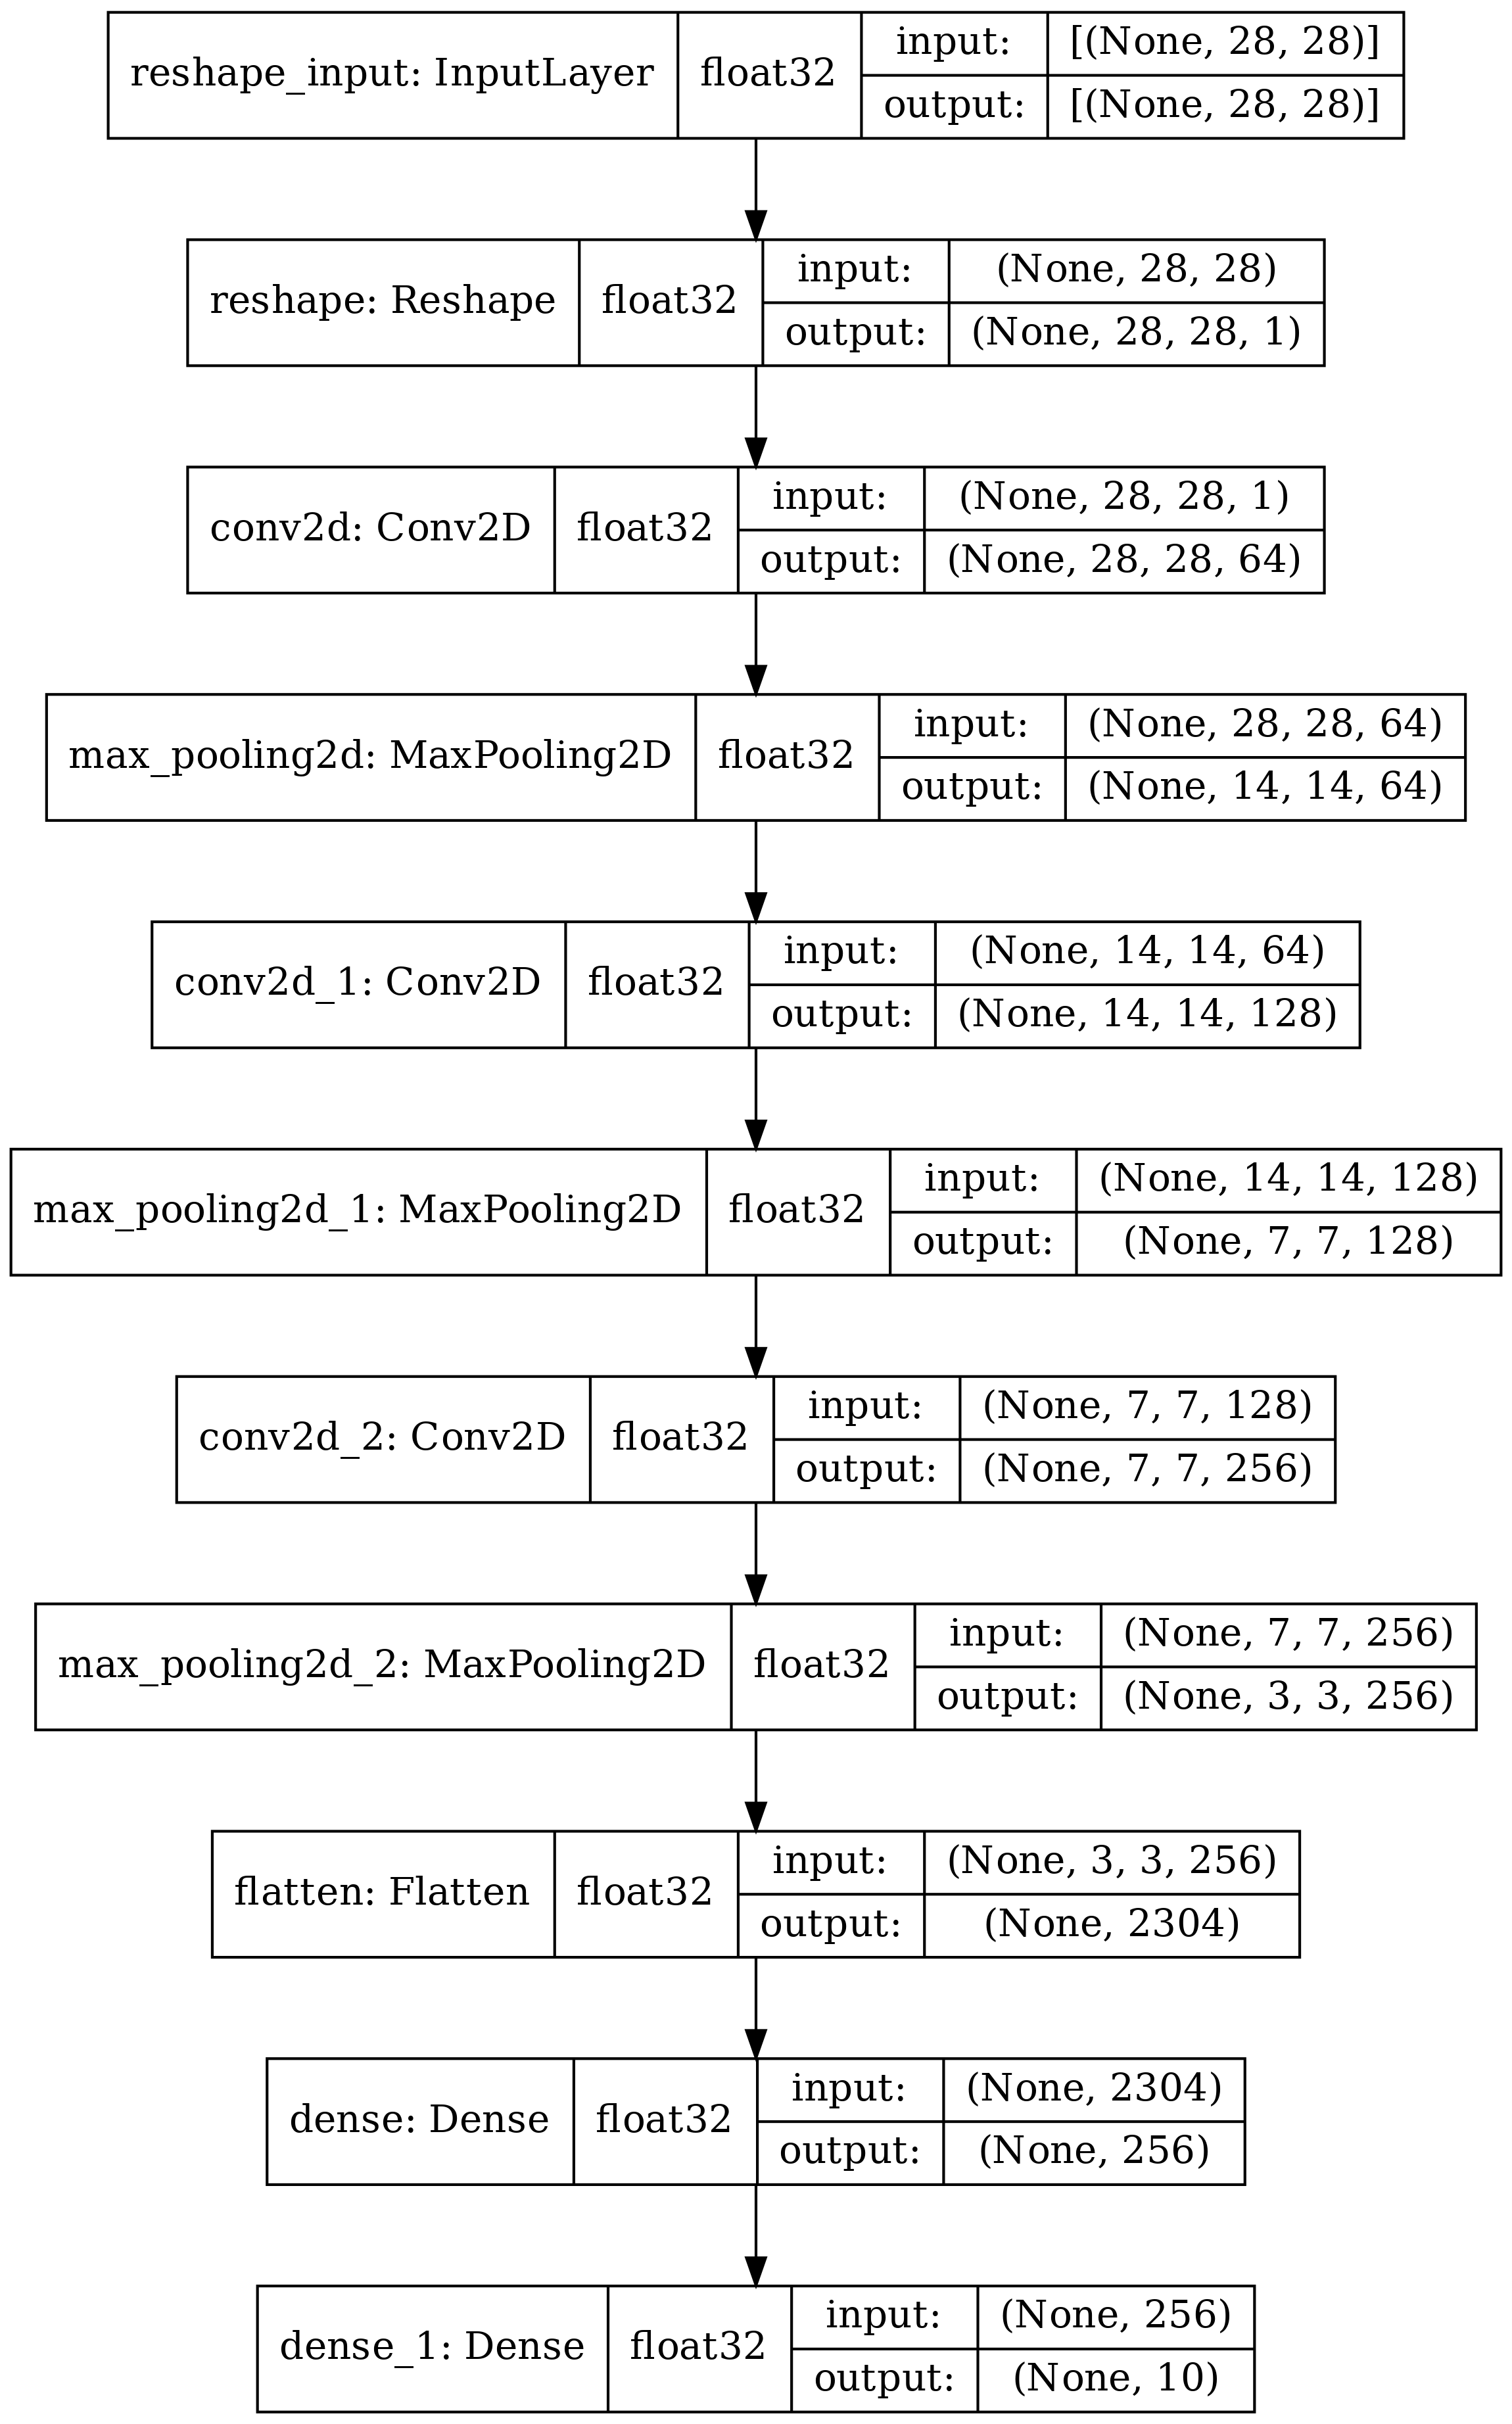

In [7]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=300,
)